Importing dependencies

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import cv2
import datetime
from matplotlib import pyplot as plt
import time

In [ ]:
from PIL import Image

def resize_image(image_path, new_size):
    # Open the image
    image = Image.open(image_path)
    resized_image = image.resize(new_size)#resize
    resized_image.save("resized_image.jpg") 

image_path = "/content/drive/MyDrive/Quantum_Proj/PNEUMONIA/person1000_bacteria_2931.jpeg"


In [ ]:
image=Image.open(image_path)

In [ ]:
new_size = (128, 128)

resize_image(image_path, new_size)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
image = cv2.imread('/content/drive/MyDrive/Quantum_Proj/PNEUMONIA/person1000_bacteria_2931.jpeg') 
image=image.reshape((-1,3))
k_values = range(1, 11)  
distortions = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
    kmeans.fit(image)
    distortions.append(kmeans.inertia_)
plt.plot(k_values, distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
image1=cv2.imread("/content/drive/MyDrive/Quantum_Proj/PNEUMONIA/person1000_bacteria_2931.jpeg")
image2=cv2.imread("/content/drive/MyDrive/Quantum_Proj/PNEUMONIA/person1000_virus_1681.jpeg")
image3=cv2.imread("/content/drive/MyDrive/Quantum_Proj/PNEUMONIA/person1001_bacteria_2932.jpeg")
image=[image1,image2,image3]
reshaped=[0,0,0]
for i in range(0,3):
    reshaped[i] = image[i].reshape(image[i].shape[0] * image[i].shape[1], image[i].shape[2])

In [ ]:
numClusters=list(map(int,input("Enter the number of culsters for image 1,2 and 3 respectively: ").split(" ")))

Enter the number of culsters for image 1,2 and 3 respectively: 3 3 3


In [ ]:
clustering=[0,0,0]
for i in range(0,3):
    kmeans = KMeans(n_clusters=numClusters[i], n_init=40, init='k-means++',max_iter=500).fit(reshaped[i])
    clustering[i] = np.reshape(np.array(kmeans.labels_, dtype=np.uint8),
    (image[i].shape[0], image[i].shape[1]))

In [ ]:
sortedLabels=[[],[],[]]
for i in range(0,3):
    sortedLabels[i] = sorted([n for n in range(numClusters[i])],
        key=lambda x: -np.sum(clustering[i] == x))

In [ ]:
kmeansImage=[0,0,0]
concatImage=[[],[],[]]
for j in range(0,3):
    kmeansImage[j] = np.zeros(image[j].shape[:2], dtype=np.uint8)
    for i, label in enumerate(sortedLabels[j]):
        kmeansImage[j][ clustering[j] == label ] = int((255) / (numClusters[j] - 1)) * i
    concatImage[j] = np.concatenate((image[j],193 * np.ones((image[j].shape[0], int(0.0625 * image[j].shape[1]), 3), dtype=np.uint8),cv2.cvtColor(kmeansImage[j], cv2.COLOR_GRAY2BGR)), axis=1)

AxesImage(size=(768, 2211))


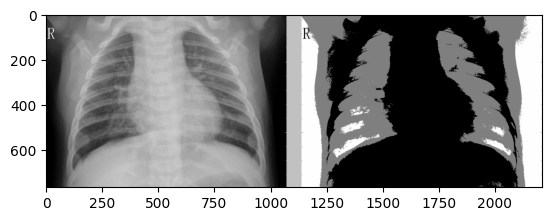

In [ ]:
print(plt.imshow(concatImage[1]))

AxesImage(size=(863, 2565))


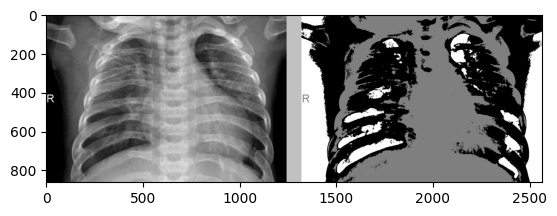

In [ ]:
print(plt.imshow(concatImage[2]))

AxesImage(size=(863, 2565))


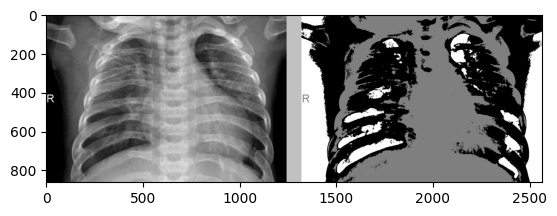

In [ ]:
print(plt.imshow(concatImage[2]))